In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
%matplotlib inline

In [96]:
df00=pd.read_csv(r'C:\Users\ido14\OneDrive\Desktop\שנה א\מדעי הנתונים\מטלות\Final Projact\regression\insurance.csv')

In [97]:
df00.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
df00.shape

(1338, 7)

In [99]:
df00.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [100]:
df00.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [101]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* There are three numerical features and three object features that i will take care of them.

## Mean of the featurs
* age- the age of the patient.
* sex- male or female.
* bmi-  is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m^2, resulting from mass in kilograms and height in metres.
* children- number of childrens the patient has.
* smoker- if the patient is a smoker or not.
* region- the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges- Individual medical costs billed by health insurance.

#### I will try to analyze the bmi effect on the charges.
* I know that by the bmi values if the person's bmi value is under 18.5 he is in underweight status.
* If the person's bmi is between 18.5 to 25 he is in normal weight status.
* And if the person's bmi is over 25 he is in overweight status.

In [102]:
df01=df00.copy()

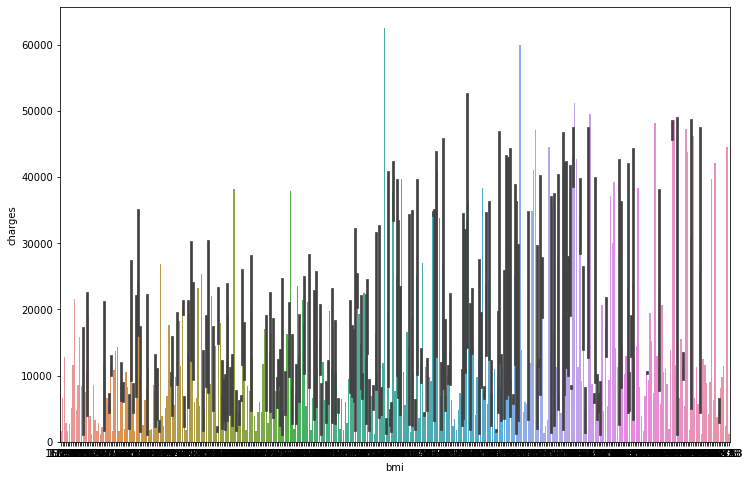

In [103]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='bmi', y='charges',  data=df01[(df01.sex=='male')])

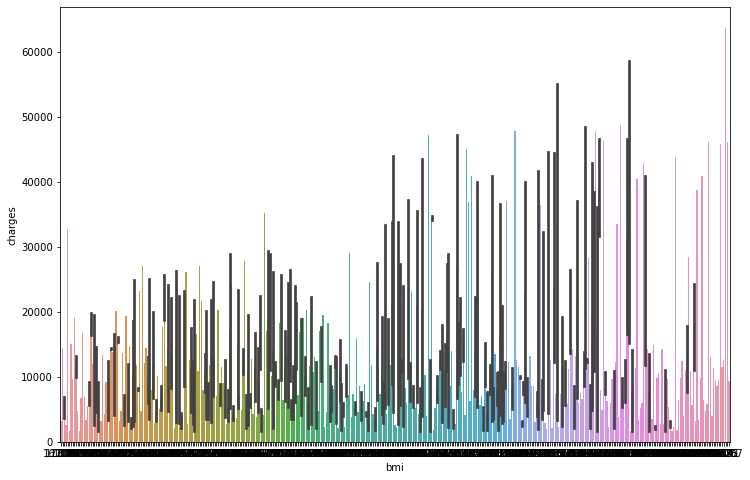

In [104]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='bmi', y='charges',  data=df01[(df01.sex=='female')])

* We can see that there is direct corrolation between the charges and the bmi, the more the bmi is higher the more the charges are higher.

#### Now i will look for the correlation between the charges, the age, and smoking status.

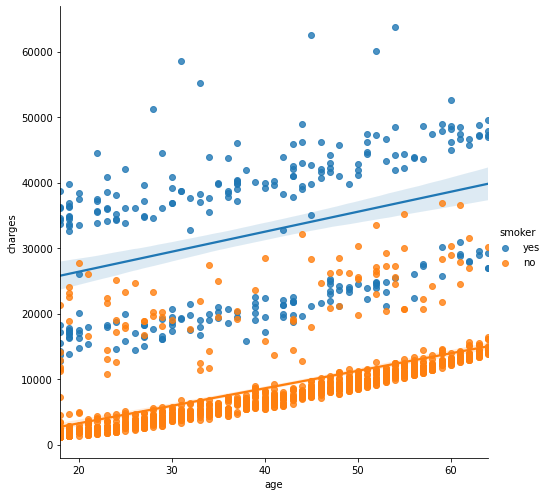

In [105]:
sns.lmplot(x='age', y='charges', hue='smoker', data=df01, height = 7)

* We can see that the age effects on the charges, the more the person old the higher the charges.
* We can see that there are two peoples that are on the same age but the smoker pays more then the non smoker.
* From that we can conclude that the older the person the charges are higher, and if the person smokes his charges are higher.

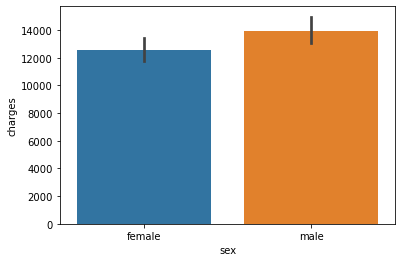

In [106]:
ax = sns.barplot(x='sex', y='charges',  data=df01)

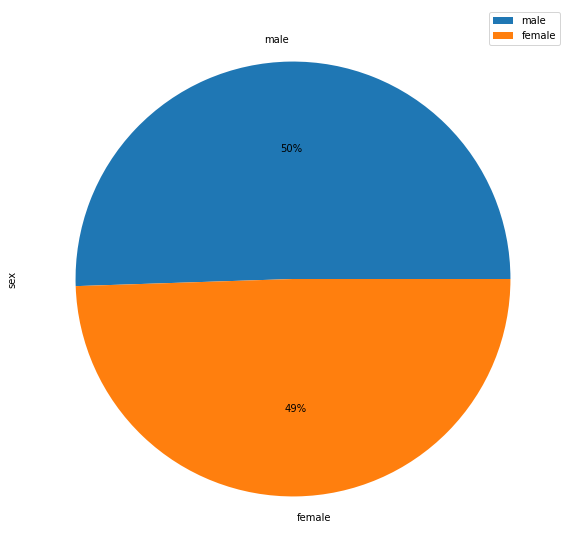

In [107]:
plt.figure(figsize=(10,10))
df01['sex'].value_counts().plot(kind='pie',autopct="%2i%%")
plt.legend()
plt.show()

* It seems like there is no correlation between the gender and the charges, the charges are almost the same and there is just one precent more male than female.

### Correlation between charges and region

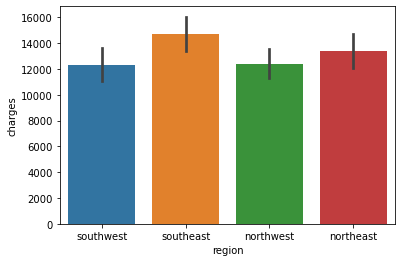

In [108]:
ax = sns.barplot(x='region', y='charges',  data=df01)

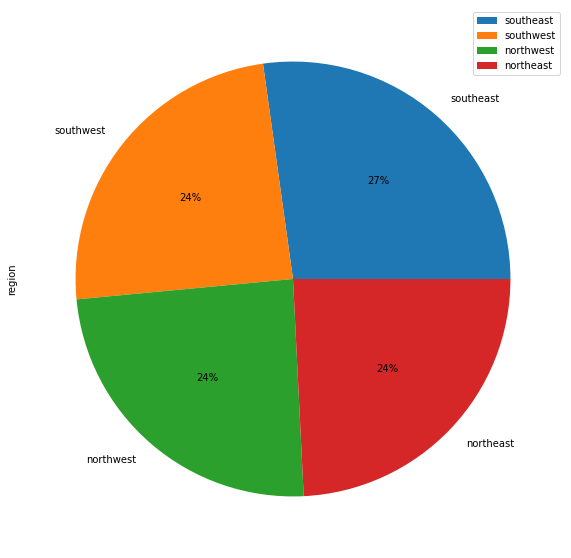

In [109]:
plt.figure(figsize=(10,10))
df01['region'].value_counts().plot(kind='pie',autopct="%2i%%")
plt.legend()
plt.show()

* We can see that all of the regions charges are almost the same except of southeast that is higher, but if we will look at the pie table we can see that the southeast precent is the largest and that is the reason for the higher charges value.
* It's look like there is no correlation between the region and the charges.


## Preproccesing
* Now i will take care of the object types features.

In [110]:
df02=df01.copy()

In [111]:
df02['sex'].replace({'male': 0, 'female': 1},inplace = True)
df02['smoker'].replace({'no': 0, 'yes': 1},inplace = True)

In [112]:
df02.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [113]:
dummies=pd.get_dummies(df02['region'])
df02=pd.concat([df02,dummies],axis=1)
df02.drop('region',axis=1,inplace=True)

In [114]:
df02.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


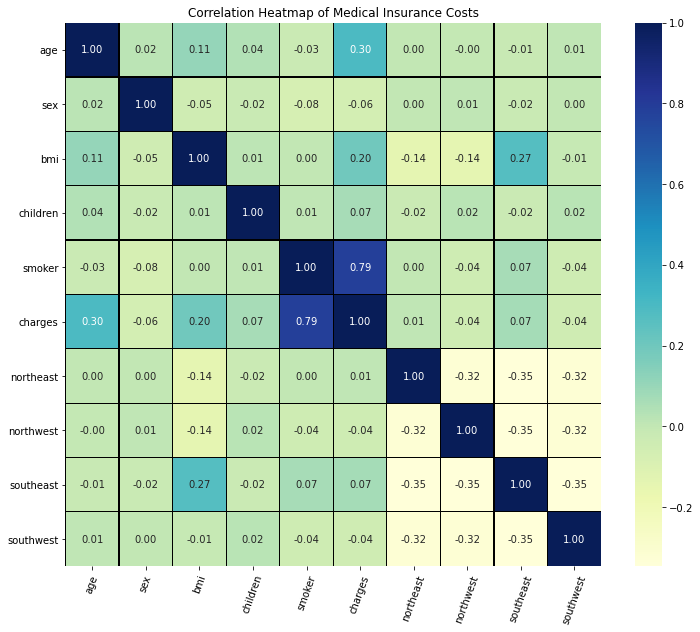

In [115]:
plt.figure(figsize=(12,10))
plt.title('Correlation Heatmap of Medical Insurance Costs')
ax = sns.heatmap(df02.corr(), square=False, annot=True, fmt='.2f', linecolor='black',linewidths=.2,cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
plt.show()

* As i tought there is positive correlation bewtween charges and bmi.
* Also as i tought there is high positive correlation between charges and smoking status, and there is positive correlation between the age and the charges.
* As we saw there is absolutly no correlation between the region and the charges.
* Also there is no correlation between sex and charges.
* There is also very small correlation between children and charges.

In [116]:
df03=df02.copy()

# Model training
* The selected feature that we want to work on is charges.

In [117]:
x = df03.drop(['charges'], axis = 1)
y = df03.charges

In [118]:
y.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [119]:
x.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.2, random_state=0)

In [121]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x.columns)

* First i will create the dummt regressor and than i will try to see if i can get better score than the dummy regressor.

In [122]:
from sklearn.dummy import DummyRegressor
dummy_mean = DummyRegressor(strategy='median')
dummy_mean.fit(x_train, y_train)

DummyRegressor(strategy='median')

In [123]:
print (metrics.mean_squared_error(y_test,dummy_mean.predict(x_test), squared=False))

13266.333044675308


* Later i will want to compare the mse of the dummy to the mse of my model in order to get lower mse.

In [124]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [125]:
print("linear regression score:",regressor.score(x_test, y_test))
y_pred = regressor.predict(x_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared score:',regressor.score(x_train, y_train))

linear regression score: 0.7999876970680433
RMSE: 5641.62655885019
R Squared score: 0.7370262574551634


* I can see that the mse is not that good but it is better than the rmse of the dummy.
* But i want better results from the model, i will try the random forests regressor later.

### Cross validation for the linear regression model

In [71]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=regressor, X=x_train, y=y_train,cv=4,scoring='neg_root_mean_squared_error')
print("average accuracy:",np.mean(accuracies))
print("stdeviation accuracy:",np.std(accuracies))

average accuracy: -6213.865346964803
stdeviation accuracy: 319.05351626018745


In [73]:
accuracies = cross_val_score(estimator=regressor, X=x_train, y=y_train, cv=4 , scoring='r2')
print("average accuracy:",np.mean(accuracies))
print("stdeviation accuracy:",np.std(accuracies))

average accuracy: 0.7233208582233721
stdeviation accuracy: 0.048085882897118806


### Random forest regressor

In [127]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(criterion = 'mse',random_state = 1)
forest.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [129]:
print("linear regression score:",forest.score(x_test, y_test))
y_pred = forest.predict(x_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared score:',forest.score(x_train, y_train))

linear regression score: 0.8803710968727726
RMSE: 4363.088682031676
R Squared score: 0.9751186802683454


* That's really good results, i got better score, lower RMSE and higher R squared score.


### Cross validation for the Random forest regressor

In [91]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=forest, X=x_train, y=y_train,cv=4,scoring='neg_root_mean_squared_error')
print("average accuracy:",np.mean(accuracies))
print("stdeviation accuracy:",np.std(accuracies))

average accuracy: -5091.924798274893
stdeviation accuracy: 433.27503711550736


In [92]:
accuracies = cross_val_score(estimator=forest, X=x_train, y=y_train, cv=4 , scoring='r2')
print("average accuracy:",np.mean(accuracies))
print("stdeviation accuracy:",np.std(accuracies))

average accuracy: 0.8135518469381429
stdeviation accuracy: 0.039062515030295404


### Trying to improve the results
* I will try to improve the score by drop the region feature because it correlation with the charges is not affective.

In [61]:
df04=df03.drop(['northeast','northwest','southeast','southwest'], axis=1)

In [62]:
x1=df04.drop(['charges'], axis=1)
y1=df04['charges']

In [63]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test =  train_test_split(x1,y1, test_size=0.2, random_state=0)

In [64]:
scaler = MinMaxScaler()
scaler.fit(x1_train)
x1_train=pd.DataFrame(scaler.transform(x1_train),columns=x1.columns)
x1_test=pd.DataFrame(scaler.transform(x1_test),columns=x1.columns)

In [130]:
regressor= LinearRegression()
regressor.fit(x1_train,y1_train)
print("linear regression score:",regressor.score(x1_test, y1_test))
y1_pred = regressor.predict(x1_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('R Squared score:',regressor.score(x1_train, y1_train))

linear regression score: 0.7978644236809904
RMSE: 5671.492452926755
R Squared score: 0.7361388804467515


* We got lower score and higher RMSE than before, i will try to drop the sex and the children in order to get better score, because both are not correlated positive with charges.

In [66]:
df05=df04.drop(['sex','children'],axis=1)
x2=df05.drop(['charges'], axis=1)
y2=df05['charges']

In [67]:
x2_train, x2_test, y2_train, y2_test =  train_test_split(x2,y2, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
scaler.fit(x2_train)
x2_train=pd.DataFrame(scaler.transform(x2_train),columns=x2.columns)
x2_test=pd.DataFrame(scaler.transform(x2_test),columns=x2.columns)

In [131]:
regressor= LinearRegression()
regressor.fit(x2_train,y2_train)
print("linear regression score:",regressor.score(x2_test, y2_test))
y2_pred = regressor.predict(x2_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print('R Squared score:',regressor.score(x2_train, y2_train))

linear regression score: 0.7945500805653087
RMSE: 5717.80009607945
R Squared score: 0.7342532129942393


* Even though i droped all the features that have negative correlation with charges, i got lower score and higher RMSE than before.

## Conclusions:
* The random forest regressor gave the best results than the linear regression model.
* After dropping the features with the lowest weight on the predicition in order to get better results, i got even worst results.
* Both of the models got better results than the dummy model.
* It's clearly to say that the best model is the random forest, the model gave the highest R squared score and lowest RMSE at the cross validation.
* In order to get the best model i want high R squared score and low RMSE.